In [1]:
import data, utils, processing, metrics
from pydicom import dcmread

In [2]:
root = "D:/Datasets/CT_Recon/Breast/"

print("===Reference data===")
recon_1 = "Aice"
seg_1 = "Onco"
print(f"{recon_1}_{seg_1}")
print()
print("===Comparative data===")
recon_2 = "AIDR"
seg_2 = "Onco"
print(f"{recon_2}_{seg_2}")
print()

===Reference data===
Aice_Onco

===Comparative data===
AIDR_Onco



In [3]:
RT_path_1 = data.get_RT_path(root, 2, recon_1, seg_1)  # ID1_Aice_manual
RT_path_2 = data.get_RT_path(root, 2, recon_2, seg_2)  # ID1_AIDR_manual
print(RT_path_1, RT_path_2)

RT_structures_1 = data.get_ROI_structures(RT_path_1)
RT_contours_1 = data.get_ROI_contours(RT_path_1)

RT_structures_2 = data.get_ROI_structures(RT_path_2)
RT_contours_2 = data.get_ROI_contours(RT_path_2)

total_contours_1 = data.get_contour_data(RT_contours_1)
total_contours_2 = data.get_contour_data(RT_contours_2)

roi_names_1 = utils.get_ROI_names(RT_path_1)
roi_names_2 = utils.get_ROI_names(RT_path_2)

matched_ROIs = utils.match_ROIs(roi_names_1, roi_names_2)
utils.print_ROI_names(roi_names_1)
utils.print_ROI_names(roi_names_2)

D:/Datasets/CT_Recon/Breast/30031951/Aice/Onco_Aice/RS.30031951.OncoStudioAutoSe.dcm D:/Datasets/CT_Recon/Breast/30031951/AIDR/Onco_AIDR/RS.30031951.OncoStudioAutoSe.dcm

The common ROIs shared by two data are shown below:
29: External
28: Bowels
27: Lungs
26: Breast_R
25: Breast_L
24: Spleen
23: Liver_AIDR
22: Kidney_R
21: Kidney_L
20: Gallbladder
19: Heart1
18: BrachialP_R_AIDR
17: BrachialP_L_AIDR
16: Sigmoid_Colon
15: Bowel_Small
14: Bowel_Large
13: Cavity_Oral
12: SpinalCord
11: CaudaEquina
10: Trachea1
9: Esophagus1
8: Stomach1
7: Duodenum1
6: Parotid_R
5: Parotid_L
4: Glnd_Submand_R
3: Glnd_Submand_L
2: Lung_R_rf
1: Lung_L
0: Glnd_Thyroid

The common ROIs shared by two data are shown below:
29: External
28: Bowels
27: Lungs
26: Breast_R
25: Breast_L
24: Spleen
23: Liver_AIDR
22: Kidney_R
21: Kidney_L
20: Gallbladder
19: BrachialP_R_AIDR
18: BrachialP_L_AIDR
17: Heart1
16: Sigmoid_Colon
15: Bowel_Small
14: Bowel_Large
13: Cavity_Oral
12: Trachea1
11: SpinalCord
10: CaudaEquina
9:

(<Axes: >, <matplotlib.image.AxesImage at 0x1cc67eaaf50>)

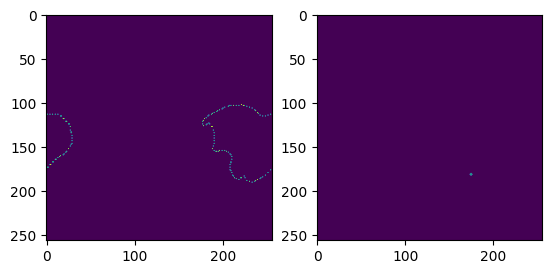

In [5]:
im_size = 256

ROI_num = 14
slice_num = 0
import matplotlib.pyplot as plt
map1 = processing.per_slice_mapping(total_contours_1[ROI_num][slice_num], im_size, (10, 100), 0.4)
map2 = processing.per_slice_mapping(total_contours_2[ROI_num][slice_num], im_size, (10, 100), 0.4)
plt.subplot(121), plt.imshow(map1)
plt.subplot(122), plt.imshow(map2)